In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.sample(7)

,review,sentiment
30624,The plane is a 747 Jumbo. The cockpit is locat...,negative
47186,Well. Where to begin. Let's just say this; avo...,negative
31696,Difficult to call The Grudge a horror movie. A...,negative
23248,"This was a pretty dull movie, actually. I thin...",negative
10405,Oh dear lord. This movie... It was horrible. I...,negative
29425,By 1987 Hong Kong had given the world such fil...,positive
9213,I saw this film many years ago (along with ano...,positive


In [6]:
df.shape

(50000, 2)

In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df['review'] = df['review'].str.lower()

In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
exclude = string.punctuation

In [11]:
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [12]:
df['review'] = df['review'].apply(remove_punc)

In [13]:
!pip install textblob


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import nltk

In [15]:
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Umar\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Umar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['review'] = df['review'].apply(lambda x: x.split())
df.head()

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",positive
1,"[a, wonderful, little, production, br, br, the...",positive
2,"[i, thought, this, was, a, wonderful, way, to,...",positive
3,"[basically, theres, a, family, where, a, littl...",negative
4,"[petter, matteis, love, in, the, time, of, mon...",positive


In [17]:
!pip install pyspellchecker


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from spellchecker import SpellChecker

In [19]:
spell = SpellChecker()
results = set()
df['review'].apply(results.update)
                
misspelled = spell.unknown(list(results))
df['review'] = df['review'].apply(lambda x:[item for item in x if item not in misspelled])
df.head()

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",positive
1,"[a, wonderful, little, production, br, br, the...",positive
2,"[i, thought, this, was, a, wonderful, way, to,...",positive
3,"[basically, a, family, where, a, little, boy, ...",negative
4,"[petter, love, in, the, time, of, money, is, a...",positive


In [20]:
from nltk.corpus import stopwords

In [21]:
wordsEng = stopwords.words('english')
print(wordsEng)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [22]:
df['review'] = df['review'].apply(lambda x:[item for item in x if item not in wordsEng])
df.head()

,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",positive
1,"[wonderful, little, production, br, br, filmin...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, family, little, boy, jake, thinks,...",negative
4,"[petter, love, time, money, visually, stunning...",positive


In [23]:
from nltk.stem import PorterStemmer

In [24]:
ps = PorterStemmer()

In [25]:
df['review'] = df['review'].apply(lambda x: [ps.stem(y) for y in x])
df.head()

,review,sentiment
0,"[one, review, mention, watch, 1, oz, episod, h...",positive
1,"[wonder, littl, product, br, br, film, techniq...",positive
2,"[thought, wonder, way, spend, time, hot, summe...",positive
3,"[basic, famili, littl, boy, jake, think, zombi...",negative
4,"[petter, love, time, money, visual, stun, film...",positive


In [26]:
df['review'] = df['review'].apply(lambda x: [w for w in x if len(w)>2])
df.head()

,review,sentiment
0,"[one, review, mention, watch, episod, hook, ri...",positive
1,"[wonder, littl, product, film, techniqu, unass...",positive
2,"[thought, wonder, way, spend, time, hot, summe...",positive
3,"[basic, famili, littl, boy, jake, think, zombi...",negative
4,"[petter, love, time, money, visual, stun, film...",positive


In [27]:
df['review'] = df['review'].apply(lambda x: " ".join(x))
df.head()

,review,sentiment
0,one review mention watch episod hook right exa...,positive
1,wonder littl product film techniqu unassum fas...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter love time money visual stun film watch ...,positive


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cv = CountVectorizer()

In [30]:
cv_fit = cv.fit_transform(df['review'])

In [31]:
X = cv_fit
y = df['sentiment']

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
y = le.fit_transform(y)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [35]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
y_pred = model.predict(X_test)

In [39]:
acc1 = accuracy_score(y_test,y_pred)

In [40]:
print(acc1)

0.8767


In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
model = MultinomialNB()

In [43]:
model.fit(X_train,y_train)

MultinomialNB()

In [44]:
y_pred = model.predict(X_test)

In [45]:
acc2 = accuracy_score(y_test,y_pred)

In [46]:
print(acc2)

0.8515


In [47]:
from sklearn.svm import LinearSVC

In [48]:
model = LinearSVC()

In [49]:
model.fit(X_train,y_train)

LinearSVC()

In [50]:
y_pred = model.predict(X_test)

In [51]:
acc3 = accuracy_score(y_test,y_pred)

In [52]:
print(acc3)

0.8492


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

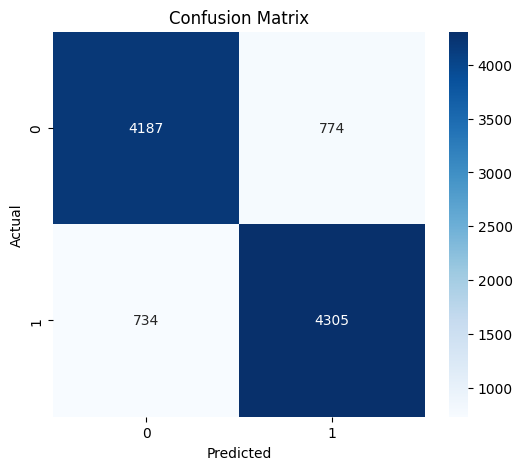

In [57]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
model = LogisticRegression(max_iter=2000, solver='liblinear')

In [61]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],      
    'penalty': ['l1', 'l2']        
}

In [63]:
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=2000, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [64]:
print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

Best params: {'C': 0.1, 'penalty': 'l2'}
Best CV accuracy: 0.8835749999999999


In [66]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8861
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

